In [5]:
!pip install --upgrade mysql-connector-python

In [6]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
ram=mysql.connector.connect(
    host="localhost",
    user="root",
    password="Ram@230243",
    database="apple",
    auth_plugin="mysql_native_password",
    use_pure=True
)

mycursor=ram.cursor()

print(ram)

In [11]:
code = '''mycursor.execute("select * from models")
output = mycursor.fetchall()
for x in output:
    print(x)'''

# Replace non-breaking spaces with normal ones
#clean_code = code.replace('\u00A0', ' ')
#xec(clean_code)

In [13]:
query='select*from models'
mobiles=pd.read_sql(query,ram)

In [15]:
mobiles.shape

(5000, 11)

In [17]:
mobiles.head()

,S_no,Brand,Model,colour,varient_GB,city,pincode,promoter_name,purchase_date,IMEI_number,payment_method
0,1,Apple,iPhone 16 Pro,Purple,256,Bapatla,526596,Srinivas,2024-08-19,497745449790,Credit Card
1,2,Apple,iPhone 12,Purple,64,Dr. B.R. Ambedkar Konaseema,520320,Abhi,2024-07-22,964240852199,Finance
2,3,Apple,iPhone 15 Mini,Purple,512,Visakhapatnam,514306,Prasad,2023-10-17,917553885783,UPI
3,4,Apple,iPhone 16 Pro,Black,256,Vijayanagaram,511360,Lokesh,2023-11-22,318554143093,Net Banking
4,5,Apple,iPhone 14 Pro,Green,128,Vizianagaram,520196,Kumar,2024-10-29,292761945638,Finance


In [21]:
mobiles['Model'].value_counts()
mobiles['city'].value_counts()

city
Guntur                         202
Kakinada                       191
Nellore                        188
NTR                            187
YSR Kadapa                     183
Annamayya                      182
Kurnool                        182
Alluri Sitharama Raju          181
Rajamahendravaram              181
Parvathipuram Manyam           178
Bapatla                        174
Tirupati                       174
Machilipatnam                  171
Eluru                          171
Visakhapatnam                  171
Anantapur                      170
Prakasam                       169
East Godavari                  168
Sri Sathya Sai                 168
Vizianagaram                   168
West Godavari                  167
Srikakulam                     167
Krishna                        163
Palnadu                        160
Dr. B.R. Ambedkar Konaseema    159
Vijayanagaram                  159
Chittoor                       158
Nandyal                        154
Konaseema      

In [23]:
count = mobiles.query("Model =='iPhone 16 Pro'and city == 'Bapatla'")

In [23]:
print (count)

      S_no  Brand          Model  colour  varient_GB     city  pincode  \
0        1  Apple  iPhone 16 Pro  Purple         256  Bapatla   526596   
128    129  Apple  iPhone 16 Pro  Purple         512  Bapatla   516677   
400    401  Apple  iPhone 16 Pro    Blue         128  Bapatla   503720   
521    522  Apple  iPhone 16 Pro     Red         256  Bapatla   533208   
579    580  Apple  iPhone 16 Pro    Blue         256  Bapatla   520841   
1454  1455  Apple  iPhone 16 Pro  Purple          64  Bapatla   524657   
2592  2593  Apple  iPhone 16 Pro   Black         512  Bapatla   500937   
3019  3020  Apple  iPhone 16 Pro   Green         512  Bapatla   509681   
3084  3085  Apple  iPhone 16 Pro  Purple         128  Bapatla   508804   
3285  3286  Apple  iPhone 16 Pro  Purple         256  Bapatla   533845   
3483  3484  Apple  iPhone 16 Pro    Blue         256  Bapatla   519016   
3497  3498  Apple  iPhone 16 Pro   Black          64  Bapatla   508543   
3602  3603  Apple  iPhone 16 Pro   Bla

In [25]:
count = mobiles.query("Model == 'iPhone 16 Pro' and city == 'Bapatla' and varient_GB ==256")

In [27]:
print (count)

      S_no  Brand          Model  colour  varient_GB     city  pincode  \
0        1  Apple  iPhone 16 Pro  Purple         256  Bapatla   526596   
521    522  Apple  iPhone 16 Pro     Red         256  Bapatla   533208   
579    580  Apple  iPhone 16 Pro    Blue         256  Bapatla   520841   
3285  3286  Apple  iPhone 16 Pro  Purple         256  Bapatla   533845   
3483  3484  Apple  iPhone 16 Pro    Blue         256  Bapatla   519016   
3602  3603  Apple  iPhone 16 Pro   Black         256  Bapatla   516138   

     promoter_name purchase_date   IMEI_number payment_method  
0         Srinivas    2024-08-19  497745449790    Credit Card  
521       Srinivas    2025-02-28  486736518864            UPI  
579       Srinivas    2024-11-17  491856444278            UPI  
3285      Srinivas    2024-03-08  756969948147            UPI  
3483      Srinivas    2024-05-26  559043206927        Finance  
3602      Srinivas    2025-01-11  204193921571            UPI  


In [29]:
mobiles['purchase_date'] = pd.to_datetime(mobiles['purchase_date'], format='%d-%m-%Y')
mobiles['year'] = mobiles['purchase_date'].dt.year

# Query for year, model, and location

count = mobiles.query("Model == 'iPhone 16 Pro' and city == 'Bapatla' and varient_GB ==256 and year==2024")
print(count)

      S_no  Brand          Model  colour  varient_GB     city  pincode  \
0        1  Apple  iPhone 16 Pro  Purple         256  Bapatla   526596   
579    580  Apple  iPhone 16 Pro    Blue         256  Bapatla   520841   
3285  3286  Apple  iPhone 16 Pro  Purple         256  Bapatla   533845   
3483  3484  Apple  iPhone 16 Pro    Blue         256  Bapatla   519016   

     promoter_name purchase_date   IMEI_number payment_method  year  
0         Srinivas    2024-08-19  497745449790    Credit Card  2024  
579       Srinivas    2024-11-17  491856444278            UPI  2024  
3285      Srinivas    2024-03-08  756969948147            UPI  2024  
3483      Srinivas    2024-05-26  559043206927        Finance  2024  


In [31]:
count = mobiles.query("Model == 'iPhone 16 Pro' and city == 'Bapatla' and varient_GB ==256 and year==2025")

In [33]:
print (count)

      S_no  Brand          Model colour  varient_GB     city  pincode  \
521    522  Apple  iPhone 16 Pro    Red         256  Bapatla   533208   
3602  3603  Apple  iPhone 16 Pro  Black         256  Bapatla   516138   

     promoter_name purchase_date   IMEI_number payment_method  year  
521       Srinivas    2025-02-28  486736518864            UPI  2025  
3602      Srinivas    2025-01-11  204193921571            UPI  2025  


In [35]:
pd.set_option('display.max_rows',None)
count=mobiles.query("promoter_name=='Srinivas'")

In [37]:
print(count)

      S_no  Brand              Model  colour  varient_GB     city  pincode  \
0        1  Apple      iPhone 16 Pro  Purple         256  Bapatla   526596   
72      73  Apple          iPhone 13    Blue         512  Bapatla   533203   
106    107  Apple          iPhone 14  Purple         256  Bapatla   521291   
124    125  Apple  iPhone 15 Pro Max   Black         512  Bapatla   524703   
128    129  Apple      iPhone 16 Pro  Purple         512  Bapatla   516677   
133    134  Apple  iPhone 14 Pro Max  Purple         256  Bapatla   529039   
153    154  Apple  iPhone 16 Pro Max   White         128  Bapatla   514444   
155    156  Apple     iPhone 16 Mini   White         512  Bapatla   509632   
197    198  Apple          iPhone 16    Blue          64  Bapatla   519383   
214    215  Apple      iPhone 15 Pro  Purple         128  Bapatla   513030   
246    247  Apple          iPhone 12     Red         256  Bapatla   506200   
267    268  Apple  iPhone 16 Pro Max  Purple         256  Bapatl

In [39]:
count.to_excel("srinivas_output.xlsx", index=False)

print("Excel file saved as srinivas_output.xlsx")

Excel file saved as srinivas_output.xlsx


<Axes: xlabel='Model', ylabel='count'>

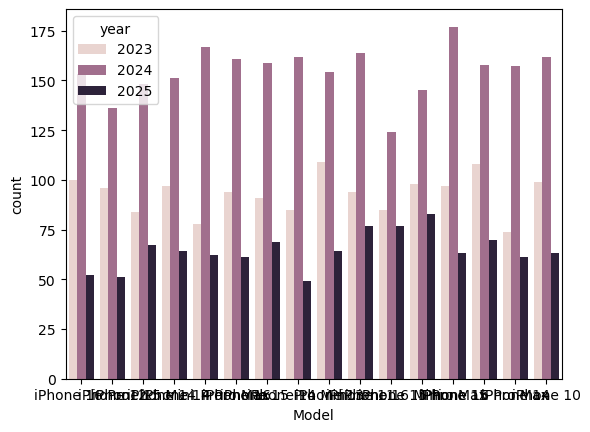

In [41]:
sns.countplot(mobiles,x="Model",hue="year")

In [43]:
count.to_excel("count_output.xlsx", index=False)

print("Excel file saved as count_output.xlsx")

Excel file saved as count_output.xlsx
